In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
L = 1.
nt = 100
nx = 51
alpha = 1.22*10**-3

q = 0.

dx = L/(nx-1)

qdx = q*dx

Ti = numpy.zeros(nx)
Ti[0] = 100


In [4]:
from scipy.linalg import solve

In [7]:
def generateMatrix(N,sigma):
    d =numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    d[-1,-1] = 1+1./sigma
    
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A


In [8]:
def generateRHS(T, sigma, qdx):
    b = T[1:-1]*1./sigma
    
    #considering Dirchlet
    b[0] += T[0]
    
    #considering Neumann BC
    b[-1] += qdx
    
    return b

In [9]:
def implicit_btcs(T, A,nt, sigma, qdx):
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma, qdx)
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[-1] = T[-2] + qdx
        
    return T

In [11]:
sigma = 0.5
dt = sigma * dx*dx/alpha 
nt = 1000

A = generateMatrix(nx, sigma)

In [12]:
print (A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


In [14]:
T = implicit_btcs(Ti.copy(), A,nt, sigma, qdx)

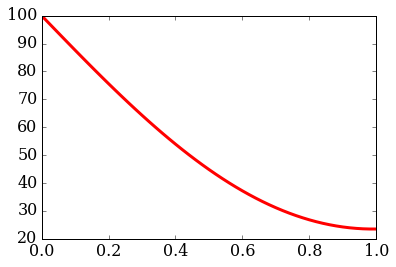

In [15]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='r', ls='-', lw=3);

In [16]:
sigma = 5.

A = generateMatrix(nx, sigma)

T = implicit_btcs(Ti.copy(), A,nt, sigma, qdx)

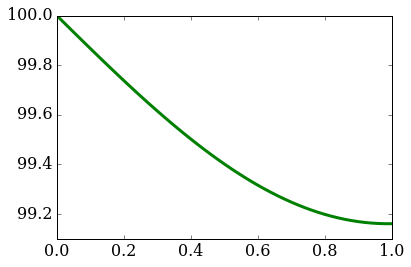

In [17]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='g', ls='-', lw=3);